# DS5220 Supervised Machine Learning - Final Project 

Aishwarya Abbimutt Nagendra Kumar, Keerthana Velilani

# Classification on CIFAR-10 dataset

This project will focus on implementing different classification algorithms on the CIFAR-10 dataset.
We are going to use Python for the project.

## Data 

The data used for this project is the CIFAR-10 dataset. 
It is an image dataset that contains 60000 images belonging to 10 classes. There are 50000 training images and 10000 test images.
Each image is 32x32x3, i.e. 32x32 pixels colour images(3 channels - RGB). 
The 10 image classes are:
 * Airplane
 * Automobile 
 * Bird
 * Cat
 * Deer
 * Dog
 * Frog
 * Horse
 * Ship
 * Truck
 

In [19]:
#Importing dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import keras
from keras.datasets import cifar10

from sklearn.metrics import *  
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

import time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [2]:
#Importing the data

# define num_class
num_classes = 10
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# load dataset keras will download cifar-10 datset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Converting the 50000 , 32*32*3 images into 50000 * 3072 arrays
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = y_train.flatten()
y_test = y_test.flatten()

# normalize the datasets
x_train /= 255.
x_test /= 255.

print(x_train.shape , "train shape")
print(x_test.shape , "test shape")
print(y_train.shape , "train shape")
print(y_test.shape , "test shape")

(50000, 3072) train shape
(10000, 3072) test shape
(50000,) train shape
(10000,) test shape


### Logistic regression

The first model we choose to run is Logistic regression, we will use this as a baseline.
Logistic regression is normally used for binary classification tasks, but we can use it for multi-class classification as well.


In [5]:
start = time.time()

# 3-fold cross-validation
cv = KFold(n_splits=3, random_state=1, shuffle=True)

# logistic regression model
log_clf = LogisticRegression()

# Evaluating the model using cross-validation
scores = cross_val_score(log_clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# model performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

end= time.time()
print("Logistic reg time taken:", end-start, "secs")

Accuracy: 0.405 (0.007)
Logistic reg time taken: 112.40054035186768 secs


In [6]:
log_model = log_clf.fit(x_train, y_train)

C:\Users\aish0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
#prediction on test data
y_hat_log = log_clf.predict(x_test)
accuracy_score(y_test, y_hat_log)

0.4051

In [8]:
#Classification report
print(classification_report(y_test, y_hat_log))

              precision    recall  f1-score   support

           0       0.43      0.48      0.45      1000
           1       0.47      0.49      0.48      1000
           2       0.32      0.28      0.30      1000
           3       0.31      0.23      0.27      1000
           4       0.36      0.29      0.32      1000
           5       0.33      0.37      0.35      1000
           6       0.42      0.49      0.45      1000
           7       0.46      0.44      0.45      1000
           8       0.47      0.52      0.49      1000
           9       0.43      0.46      0.44      1000

    accuracy                           0.41     10000
   macro avg       0.40      0.41      0.40     10000
weighted avg       0.40      0.41      0.40     10000



The logistic model does not seem to converge since max_iterations in th default lbfgs solver is 100. We can try using a different optimizer(solver) and higher iterations in this case. Here we are using the "saga" optimizer which is a version of stochastic average gradient descent to optmize the model parameters.

In [9]:
start = time.time()

log_clf2= LogisticRegression(solver='saga')
log_model2 = log_clf2.fit(x_train, y_train)

end= time.time()
print("Logistic reg with saga time taken:", end-start, "secs")

Logistic reg with saga time taken: 1518.241302728653 secs


C:\Users\aish0\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [10]:
#prediction on test data
y_hat_log2 = log_clf2.predict(x_test)
accuracy_score(y_test, y_hat_log2)

0.4033

In [11]:
#Classification report
print(classification_report(y_test, y_hat_log2))

              precision    recall  f1-score   support

           0       0.46      0.49      0.47      1000
           1       0.47      0.47      0.47      1000
           2       0.32      0.29      0.31      1000
           3       0.28      0.26      0.27      1000
           4       0.35      0.29      0.32      1000
           5       0.33      0.33      0.33      1000
           6       0.40      0.46      0.43      1000
           7       0.45      0.44      0.44      1000
           8       0.50      0.53      0.52      1000
           9       0.43      0.46      0.45      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



As expected logistic regression does not perform very well on image classification task. Even with a "saga" classifier it was not able to converge properly. Logistic regression is a linear classification model that works by fitting a linear decision boundary to separate the classes. However, image classification tasks typically involve highly non-linear and complex relationships between the image pixels and the corresponding labels. Logistic regression is not capable of capturing these complex relationships, and therefore may not perform well on image classification tasks.

This model establishes as a baseline for the rest of algorithms that we can try. 

### Random forest classifier

A random forest model is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and reduce overfitting.

The basic idea is to create a large number of decision trees, each trained on a random subset of the data and a random subset of the features. The final prediction is then obtained by averaging the predictions of all the individual trees in the forest.

The randomness introduced in the training process helps to create diverse trees, which can better capture the complex relationships between the features and the target variable. This makes the model less prone to overfitting and more robust to noisy data.

During prediction, each tree in the forest independently generates a prediction, and the final prediction is obtained by aggregating the results from all the trees. The algorithm is particularly effective for high-dimensional data and can handle both regression and classification problems.

#### Why Random forest?

Random forest can capture non-linear relationships between the input features and the output classes, while logistic regression assumes a linear relationship between the input features and the output classes. Non-linear relationships are common in image classification tasks, where the relationship between the pixel values and the class labels may be highly complex.

Random forest uses an ensemble of decision trees to make predictions, which can help to reduce overfitting and improve generalization performance. Unlike logistic regression, random forest is also robust to noise and outliers in the input data.


In [47]:
start = time.time()
# Define random forest classifier with default hyperparameters
rf = RandomForestClassifier()

# Train the random forest classifier
rf.fit(x_train, y_train)

# Predict on training and validation sets
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

# Calculate accuracy on training and validation sets
train_acc = accuracy_score(y_train, y_train_pred_rf)
val_acc = accuracy_score(y_test, y_test_pred_rf)

print('Training accuracy:', train_acc)
print('Validation accuracy:', val_acc)

end= time.time()
print("RF with default hyperparams, time taken:", end-start, "secs")

Training accuracy: 1.0
Validation accuracy: 0.4688
RF with default hyperparams, time taken: 311.844779253006 secs


In [48]:
#accuracy score
accuracy_score(y_test, y_test_pred_rf)

0.4688

In [49]:
#Classification report
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55      1000
           1       0.53      0.56      0.54      1000
           2       0.37      0.33      0.35      1000
           3       0.34      0.28      0.31      1000
           4       0.39      0.39      0.39      1000
           5       0.42      0.39      0.40      1000
           6       0.47      0.57      0.51      1000
           7       0.52      0.45      0.48      1000
           8       0.58      0.60      0.59      1000
           9       0.49      0.57      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



With default values for hyperparamters, the random forest classifier was able to give an accuracy of 47% on the test data. This is a poor model, which performs worse than chance. The reson behind this could be the inability of RF to clearly read the features in the image data. Image data is extremely complex, and since we do not have a lot of pre-made features that can help the algorithm understand and classify the data into respective classes, RF model can't work well on this data either. 

#### RF with hyperparameter tuning:

Random forest models require hyperparameter tuning because there are several hyperparameters that can significantly affect the performance of the model. Some of the important hyperparameters include the number of trees in the forest, the depth of the trees, the number of features used to split each node, and the minimum number of samples required to split a node.

Tuning the hyperparameters is important because different values can have a significant impact on the performance of the model, and choosing the wrong values can result in poor performance or overfitting.

We are using grid search to systematically go over the grid of hyperparamter values and choose the best estimator which has highest accuracy. 

In [41]:
# Define grid search parameters
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create random forest model
rf_model2 = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print best parameters
# print("Best parameters: ", grid_search.best_params_)


In [44]:
#Evaluate model on test set
y_pred_rf2 = grid_search.predict(x_test)

In [46]:
accuracy_score(y_test, y_pred_rf2)

0.4737

In [45]:
#classification report
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1000
           1       0.51      0.56      0.54      1000
           2       0.38      0.32      0.35      1000
           3       0.34      0.29      0.31      1000
           4       0.39      0.41      0.40      1000
           5       0.43      0.39      0.41      1000
           6       0.49      0.58      0.53      1000
           7       0.52      0.46      0.49      1000
           8       0.59      0.61      0.60      1000
           9       0.49      0.55      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



Even with tuning of hyperparamters, RF model is yielding a low accuracy. This could mean that the image data is too complex for random forest algorithm and hence we require a much more complex approach.

## Deep neural network, without convolutions

Image classification needs algorithms which are much more complex and can handle the complexity and non-linearity in image data.

A dense neural network, also known as a multi-layer perceptron, is a type of artificial neural network that consists of multiple layers of interconnected nodes or neurons. Each neuron in a dense neural network receives input from the neurons in the previous layer, and outputs a value that is computed using an activation function. The layers between the input and output layers are called hidden layers, and the number of neurons in each layer can be adjusted to optimize the performance of the network.

We have tried to use a dense neural network -specifically a feedforward neural network with 6 dense layers and the final layer being a softmax activation layer. The first five layers each have a ReLU activation function, which is a common choice for neural networks. The number of neurons in each layer progressively decreases. The last layer has 10 neurons, corresponding to the number of classes in the classification task, and uses a softmax activation function to output probabilities for each class.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(600, activation="relu"))
model.add(Dense(400, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))  #Last layer with number of classes

The model summary is as seen below:

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 600)               1843800   
                                                                 
 dense_1 (Dense)             (None, 400)               240400    
                                                                 
 dense_2 (Dense)             (None, 200)               80200     
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 2,190,060
Trainable params: 2,190,060
Non-

In [24]:
#complie the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=3)

end= time.time()
print("RF with default hyperparams, time taken:", end-start, "secs")

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
RF with default hyperparams, time taken: 2731.931521177292 secs


In [34]:
y_pred_dnn = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 2s 6ms/step


In [35]:
accuracy_score(y_test, y_pred_dnn)

0.4711

In [36]:
print(classification_report(y_test, y_pred_dnn))

              precision    recall  f1-score   support

           0       0.57      0.48      0.52      1000
           1       0.58      0.62      0.60      1000
           2       0.37      0.38      0.37      1000
           3       0.31      0.31      0.31      1000
           4       0.39      0.35      0.37      1000
           5       0.37      0.33      0.35      1000
           6       0.46      0.59      0.52      1000
           7       0.58      0.45      0.51      1000
           8       0.55      0.69      0.62      1000
           9       0.54      0.49      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



<module 'matplotlib.pyplot' from 'C:\\Users\\aish0\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

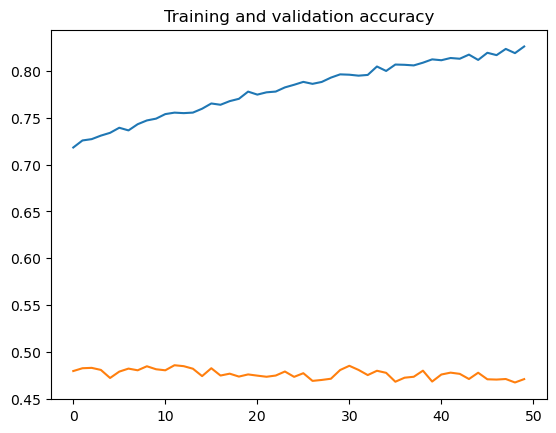

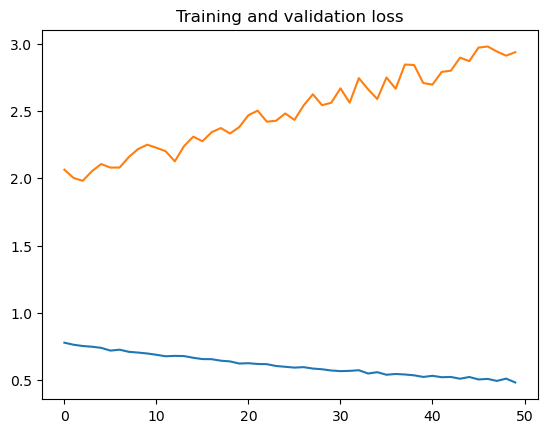

In [38]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy of Deep Neural network')
plt.xlabel('epochs', fontsize=20)
plt.ylabel('Training and validation accuracy', fontsize=20)
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss of Deep Neural network')
plt.xlabel('epochs', fontsize=20)
plt.ylabel('Training and validation loss', fontsize=20)
plt

From the above results we can clearly see that the neural network is overfitting on the training data. Perhaps, with a bit more of trial and error on the architecture of the NN and with hyperparamter tuning, we can improve the accuracy. But we will go ahead and try using convolutional layers in the network, since convolutions prove to be much more effective in image classification. 

Convolutions are helpful for image classification because they are able to capture local patterns and features in an image in a way that is translation invariant. In other words, convolutions can detect the same patterns regardless of their location in the image. Hence they outperform a lot of other techniques in terms of image classification.